<a href="https://colab.research.google.com/github/KoraySali/Dissertation_Archive/blob/main/Dissertation_Wildfire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wildfire Image Detection Dissertation**

This file will include a number of important architectures, code and technologies. A Convolutional Neural Network (CNN) model will be used for the image detection of SMOKE, NO SMOKE, FIRE, NO FIRE classification.

A chosen methodology will be followed in order to prevent confusion when writting and coding this dissertation. Various evaluation metrics will be used to evaluate the outcome of the image detection model along with a number of visualisations for readability.

For copy/version issues a Github repository has been set up in order to retain versions and prevent loss of work.

The runtime of this file will be GPU as a CPU runtime took a lot longer to perform/execute our code.

## Linking our Google Drive to our ipynb file

An important step in this file is to link it to our Google Drive allowing for usability of the drive folder for uploading and downloading various files/folders.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Dissertation')
folder = os.path.join('/content/drive/Dissertation')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dissertation_Wildfire_Detection.ipynb  main_dataset


## Importing our modules and libraries



In [2]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os
import cv2
import matplotlib.image as mpimg
import random
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

%matplotlib inline

## Pre-processing our dataset

We first begin by checking some of the images sizes.

(585, 955, 4)


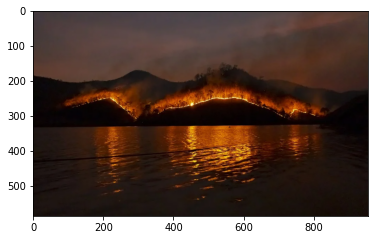

In [3]:
imgpath=r'main_dataset/train_fire/1.png'
img=plt.imread(imgpath)
print (img.shape)
imshow(img)

**We label and append the filepaths for each folder of images**

In [4]:
filepaths=[]
labels=[]
smoke_dir=r'main_dataset/train_fire'
fire_dir=r'main_dataset/train_smoke'
non_firesmoke_dir=r'main_dataset/train_nofire_nosmoke'
for d in [smoke_dir, fire_dir, non_firesmoke_dir]:
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join(d,f)
        filepaths.append(fpath)
        if d== smoke_dir:
            labels.append('smoke')
        if d== fire_dir:
            labels.append('fire')
        if d== non_firesmoke_dir:
            labels.append('nosmokefire')
            
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  24767    labels:  24767


In [5]:
X = np.array(filepaths)
y = np.array(labels)

## Pre-processing the images

Here it is important to normalise the pixels and resize the images to all the same size to make it easier for the model to use the imagery.

In [12]:
def preprocess_image(img_path):
    # Read in the image
    img = cv2.imread(img_path)
    
    # Skip the image if it was not read correctly
    if img is None:
        return None
    
    # Resize the image
    img = cv2.resize(img, (224,224))
    
    # Normalize the pixel values
    img = img / 255
    
    # Convert the image to float32
    img = np.array(img, dtype=np.float32)
    
    return img

### Caching the pre-processed images

Caching the pre-processed images proved a needed step as the number of images in our dataset consumed a lot of time so instead of running the pre-processing of images every time we run the program. They will be cached to save time.

In [ ]:
def cache_preprocessed_images(filepaths, cache_dir='/content/drive/My Drive/Dissertation/preprocessed_images'):
    # Create the cache directory if it doesn't exist
    if not os.path.exists(cache_dir):
        os.makedirs(cache_dir)
    
    for img_path in filepaths:
        # Check if the preprocessed image is already cached
        cache_path = os.path.join(cache_dir, os.path.basename(img_path))
        if os.path.exists(cache_path):
            continue
        
        # Preprocess the image
        img = preprocess_image(img_path)
        
        # Skip the image if it was not read correctly
        if img is None:
            continue
        
        # Save the preprocessed image to the cache
        np.save(cache_path, img)

In [ ]:
preprocessed_images = np.load("preprocessed_images.npy")